# Installing Dependencies

In [1]:
## Start by installing the necessary Google Cloud libraries in your Google Colab env
!pip install --upgrade --quiet gcsfs google-cloud-storage

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.2 MB/s eta 0:00:00


# Mount Google Drive

In [2]:
## Authenticate your Google account to access Google Cloud services. This will allow you to interact with Google Cloud Storage using the credentials associated with your account.
## Also import your Google Drive to access your team's Shared Google Drive as well as Operating System
from google.colab import auth
from google.colab import drive
import os

auth.authenticate_user()
drive.mount('/content/drive', force_remount=True)

## If your team is using a Shared Drive in a Google Workspace (usually through a University Gmail account)
# directory_path = '/content/drive/Shared drives/YOUR_SHARED_DRIVE_NAME/'

## if your team is using a Shared Folder in a non-Google Workspace (for a free, individual account)
directory_path = '/content/drive/MyDrive/Colab Notebooks/'


Mounted at /content/drive


# Import Dependencies

In [3]:
from google.cloud import storage
import os
# from utils import download_folder_contents
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display,clear_output

# Initialize Variables

In [4]:
CLIENT = storage.Client(project='HDSI-AGRI-Datathon-2024')
BUCKET_NAME = 'hdsi-agri-prompt-data'

## Access the specified bucket
BUCKET = CLIENT.bucket(BUCKET_NAME)
FOLDER_NAME = 'HDSI_AGRI_Prompt_2'
LOCAL_PATH = './dump'
SHARED_FOLDER = '/content/drive/MyDrive/HDSI_Datathon'

Test access to bucket

In [5]:
## All the data you need will be located in a specific prompt folder located in a Google bucket.
## I have included some code for you all to start exploring file types

## List all blobs (files and folders) in the bucket
blobs = list(BUCKET.list_blobs())

## Initialize variables to count and store folder names and file types
folders = set()
file_types = set()
blob_count = 0

## Loop through all blobs to gather folder names and file types
for blob in blobs:
    blob_name = blob.name

    ## Check if it's a folder (by convention, ends with '/')
    if blob_name.endswith('/'):
        folders.add(blob_name)
    else:
        ## Capture file type
        file_extension = blob_name.split('.')[-1] if '.' in blob_name else 'Unknown'
        file_types.add(file_extension)

    blob_count += 1

## list the folders
print("Folders in the bucket:")
for folder in folders:
    print(f" - {folder}")

## Show the file types of the first 5 files (skip folders)
print("\nFirst 5 file types:")
counter = 0
for blob in blobs:
    if not blob.name.endswith('/') and counter < 5:
        file_name = blob.name
        file_extension = file_name.split('.')[-1] if '.' in file_name else 'Unknown'
        print(f"File name: {file_name}, File type: {file_extension}")
        counter += 1

## Total count of blobs
print(f"\nTotal number of blobs in the bucket: {blob_count}")

## Print the unique file types found
print(f"\nFile types in the bucket: {', '.join(file_types)}")


Folders in the bucket:
 - HDSI_AGRI_Prompt_1/
 - HDSI_AGRI_Prompt_2/
 - HDSI_AGRI_Prompt_1/cropland_images/
 - HDSI_AGRI_Prompt_3/

First 5 file types:
File name: HDSI_AGRI_Prompt_1/NDVI_images/Adams_2001_01_NDVI.tif, File type: tif
File name: HDSI_AGRI_Prompt_1/NDVI_images/Adams_2001_02_NDVI.tif, File type: tif
File name: HDSI_AGRI_Prompt_1/NDVI_images/Adams_2001_03_NDVI.tif, File type: tif
File name: HDSI_AGRI_Prompt_1/NDVI_images/Adams_2001_04_NDVI.tif, File type: tif
File name: HDSI_AGRI_Prompt_1/NDVI_images/Adams_2001_05_NDVI.tif, File type: tif

Total number of blobs in the bucket: 14974

File types in the bucket: dbf, xlsx, csv, tif


# Download Contents from Cloud Bucket

In [6]:
from google.cloud import storage
import os

def download_folder_contents(bucket_name, folder_name, local_directory):
    # Initialize the Google Cloud Storage client
    client = storage.Client()

    # Get the bucket
    bucket = client.bucket(bucket_name)

    # List all blobs (files) in the specified folder
    blobs = bucket.list_blobs(prefix=folder_name)

    # Create the local directory if it doesn't exist
    os.makedirs(local_directory, exist_ok=True)

    # Download each file
    for blob in blobs:
        # Skip the folder itself
        if blob.name.endswith('/'):
            continue

        # Get the relative path of the file within the folder
        relative_path = os.path.relpath(blob.name, folder_name)

        # Construct the local file path
        local_file_path = os.path.join(local_directory, relative_path)

        # Create subdirectories if they don't exist
        os.makedirs(os.path.dirname(local_file_path), exist_ok=True)

        # Download the file
        blob.download_to_filename(local_file_path)
        print(f"Downloaded: {blob.name} to {local_file_path}")

# download_folder_contents(BUCKET_NAME, FOLDER_NAME, LOCAL_PATH)


In [7]:
# Move files from Local to Share drive folder
# !mv dump/*.{xlsx,csv} /content/drive/MyDrive/HDSI_Datathon/Prompt-2-Data/

# EDA Prompt 2

In [8]:
landTotalsDf = pd.read_csv(os.path.join(SHARED_FOLDER, 'Prompt-2-Data', 'prompt2_demos_landtotals_county.csv'))

<ipython-input-8-68b116ebb23d>:1: DtypeWarning: Columns (25,27,51,52,69,88,93,101,146,154,159) have mixed types. Specify dtype option on import or set low_memory=False.
  landTotalsDf = pd.read_csv(os.path.join(SHARED_FOLDER, 'Prompt-2-Data', 'prompt2_demos_landtotals_county.csv'))


In [9]:
landTotalsDf.head()

,STATE_FIPS_CODE,COUNTY_CODE,YEAR,AG_LAND_CROPLAND_HARVESTED_ACRES,AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_FULL_OWNER,AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_PART_OWNER,AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_TENANT,AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS,AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS_WHERE_TENURE_FULL_OWNER,AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS_WHERE_TENURE_PART_OWNER,...,PRODUCERS_WHITE_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_ANY_OPERATION_6_TO_10_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_ANY_OPERATION_AVG_MEASURED_IN_YEARS,PRODUCERS_YEARS_ON_ANY_OPERATION_GE_11_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_ANY_OPERATION_LT_6_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_3_TO_4_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_5_TO_9_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_AVG_MEASURED_IN_YEARS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_GE_10_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_LT_3_YEARS_NUMBER_OF_PRODUCERS
0,1,1,1997,27857,5834,13764,8259,246.0,132.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2002,26132,8897,13344,3891,201.0,113.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2007,18548,4298,8820,5430,196.0,100.0,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,2012,29676,5607,16671,7398,204.0,102.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,2017,27557,4321,17027,6209,167.0,74.0,82.0,...,493.0,84.0,22.2,386.0,98.0,66.0,104.0,20.0,368.0,30.0


The dataset has a total of 162 columns.

In [10]:
# Finding common columns between guide and the land totals
guide_crop_vars = pd.read_excel(os.path.join(SHARED_FOLDER, 'Prompt-2-Data', 'guide_prompt2_prompt3_sales.xlsx'), sheet_name='crop data variables')

set(landTotalsDf.columns) & set(guide_crop_vars.values[:, 0])

{'AG_LAND_CROPLAND_HARVESTED_ACRES',
 'AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS',
 'COUNTY_CODE',
 'STATE_FIPS_CODE',
 'YEAR'}

In [11]:
# Encode columns to efficiently act as axis labels
cols_encode = {e:i for i, e in enumerate(landTotalsDf.columns)}

In [12]:
# Checking for missing values and providing a summary of the dataset
missing_values = landTotalsDf.isnull().sum()
summary_statistics = landTotalsDf.describe(include='all')

# Display the missing values count and the summary statistics
x = missing_values.sort_values(ascending=False).head(20).apply(lambda x: round(x/len(landTotalsDf)*100,2)).reset_index()
x.columns = ['columns', 'missing_percentage']
x.to_csv('missing_values.csv')

In [13]:
# Moving the above results to drive
! mv missing_values.csv /content/drive/MyDrive/HDSI_Datathon/Prompt-2-Data/

## Missing points

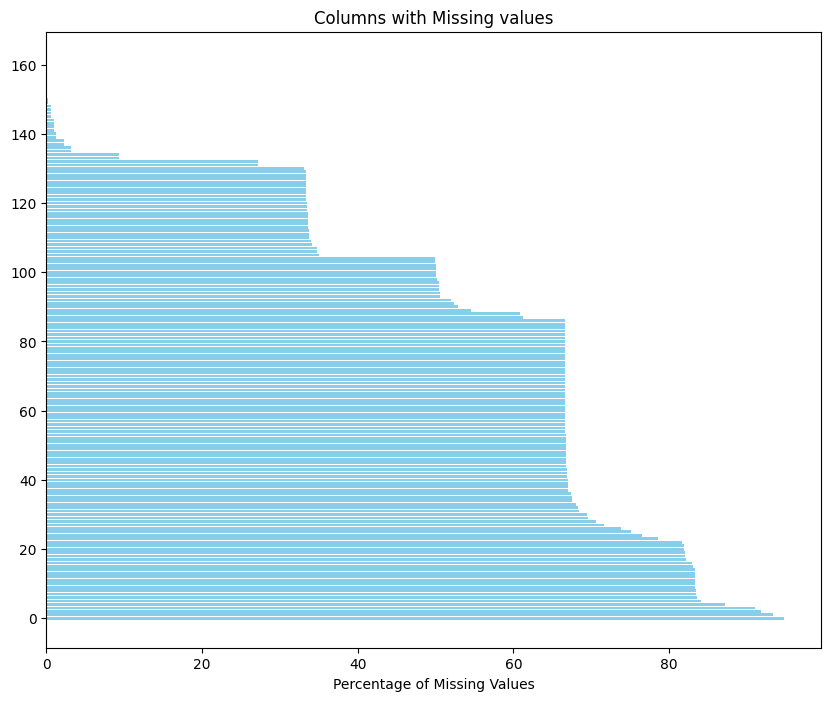

In [14]:
import matplotlib.pyplot as plt

# Calculate the percentage of missing values for each column
missing_percentage = (landTotalsDf.isnull().sum() / len(landTotalsDf)) * 100

# Sort the missing percentage in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Plot the missing values
plt.figure(figsize=(10,8))
plt.barh(list(cols_encode.values()), missing_percentage_sorted.values, color='skyblue')
plt.xlabel('Percentage of Missing Values')
plt.title('Columns with Missing values')
# plt.gca().invert_yaxis()  # Invert y-axis to display largest missing percentage at the top
plt.show()

In [15]:
# Print out the columns which start with AG
for e in landTotalsDf.columns:
  if e.startswith('AG'):
    print(e)

AG_LAND_CROPLAND_HARVESTED_ACRES
AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_FULL_OWNER
AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_PART_OWNER
AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_TENANT
AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS
AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS_WHERE_TENURE_FULL_OWNER
AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS_WHERE_TENURE_PART_OWNER
AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS_WHERE_TENURE_TENANT
AG_LAND_OWNED_IN_FARMS_ACRES
AG_LAND_OWNED_IN_FARMS_ACRES_ON_OPERATIONS_WITH_TENURE_PART_OWNER
AG_LAND_OWNED_IN_FARMS_NUMBER_OF_OPERATIONS
AG_LAND_RENTED_FROM_OTHERS_IN_FARMS_ACRES
AG_LAND_RENTED_FROM_OTHERS_IN_FARMS_ACRES_ON_OPERATIONS_WITH_TENURE_PART_OWNER
AG_LAND_RENTED_FROM_OTHERS_IN_FARMS_NUMBER_OF_OPERATIONS


In [16]:
# Print out the columns which start with FARM
for e in landTotalsDf.columns:
  if 'FARM_OPERATIONS' in e:
    print(e)

FARM_OPERATIONS_ACRES_OPERATED
FARM_OPERATIONS_ACRES_OPERATED_ON_OPERATIONS_WITH_TENURE_FULL_OWNER
FARM_OPERATIONS_ACRES_OPERATED_ON_OPERATIONS_WITH_TENURE_PART_OWNER
FARM_OPERATIONS_ACRES_OPERATED_ON_OPERATIONS_WITH_TENURE_TENANT
FARM_OPERATIONS_NUMBER_OF_OPERATIONS
FARM_OPERATIONS_NUMBER_OF_OPERATIONS_WHERE_TENURE_FULL_OWNER
FARM_OPERATIONS_NUMBER_OF_OPERATIONS_WHERE_TENURE_PART_OWNER
FARM_OPERATIONS_NUMBER_OF_OPERATIONS_WHERE_TENURE_TENANT
FARM_OPERATIONS_ORGANIZATION_GT_50_PCT_OWNERSHIP_HELD_BY_ONE_PRODUCERS_HOUSEHOLD_EXTENDED_FAMILY_ACRES_OPERATED
FARM_OPERATIONS_ORGANIZATION_GT_50_PCT_OWNERSHIP_HELD_BY_ONE_PRODUCERS_HOUSEHOLD_EXTENDED_FAMILY_OPERATIONS_WITH_AREA_OPERATED
FARM_OPERATIONS_ORGANIZATION_GT_50_PCT_OWNERSHIP_HELD_BY_PRINCIPAL_OPERATOR_RELATED_PERSONS_ACRES_OPERATED
FARM_OPERATIONS_ORGANIZATION_GT_50_PCT_OWNERSHIP_HELD_BY_PRINCIPAL_OPERATOR_RELATED_PERSONS_NUMBER_OF_OPERATIONS
FARM_OPERATIONS_ORGANIZATION_LIMITED_LIABILITY_COMPANY_ACRES_OPERATED
FARM_OPERATIONS_ORGANIZA

In [17]:
# Print out the columns which start with FARM
for e in landTotalsDf.columns:
  if 'PRODUCERS' in e:
    print(e)

FARM_OPERATIONS_ORGANIZATION_GT_50_PCT_OWNERSHIP_HELD_BY_ONE_PRODUCERS_HOUSEHOLD_EXTENDED_FAMILY_ACRES_OPERATED
FARM_OPERATIONS_ORGANIZATION_GT_50_PCT_OWNERSHIP_HELD_BY_ONE_PRODUCERS_HOUSEHOLD_EXTENDED_FAMILY_OPERATIONS_WITH_AREA_OPERATED
PRODUCERS_AGE_25_TO_34_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_35_TO_44_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_45_TO_54_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_55_TO_64_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_65_TO_74_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_AVG_MEASURED_IN_YEARS
PRODUCERS_AGE_GE_75_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_LT_25_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_LT_35_NUMBER_OF_PRODUCERS
PRODUCERS_ALL_FEMALE_NUMBER_OF_PRODUCERS
PRODUCERS_ALL_MALE_NUMBER_OF_PRODUCERS
PRODUCERS_ALL_NUMBER_OF_PRODUCERS
PRODUCERS_AMERICAN_INDIAN_OR_ALASKA_NATIVE_NUMBER_OF_PRODUCERS
PRODUCERS_ASIAN_NUMBER_OF_PRODUCERS
PRODUCERS_BLACK_OR_AFRICAN_AMERICAN_NUMBER_OF_PRODUCERS
PRODUCERS_DAY_TO_DAY_DECISIONMAKING_NUMBER_OF_PRODUCERS
PRODUCERS_DAYS_WORKED_OFF_OPERATION_0_DAYS_NUMBER_OF_PRODUCERS
PR

# Separating Operator and Producer

In [18]:
# Print out the columns which start with FARM
operator_columns = []
for e in landTotalsDf.columns:
  if 'OPERATORS' in e:
    operator_columns.append(e)

In [19]:
# Print out the columns which start with FARM
producer_columns = []
for e in landTotalsDf.columns:
  if 'PRODUCER' in e:
    # operator_columns.append(e)
    producer_columns.append(e)

In [20]:
operatorDf = landTotalsDf[operator_columns + ['YEAR', 'STATE_FIPS_CODE', 'COUNTY_CODE']].reset_index(drop=True)
producerDf = landTotalsDf[producer_columns+ ['YEAR', 'STATE_FIPS_CODE', 'COUNTY_CODE']].reset_index(drop=True)

In [21]:
columns_con_drop = set(operatorDf.columns) - set(['YEAR', 'STATE_FIPS_CODE', 'COUNTY_CODE'])
operatorDf = operatorDf.dropna(subset=columns_con_drop, how='all')
operatorDf.YEAR.unique()

array([1997, 2002, 2007, 2012])

In [22]:
columns_con_drop = set(producerDf.columns) - set(['YEAR', 'STATE_FIPS_CODE', 'COUNTY_CODE'])
producerDf = producerDf.dropna(subset=columns_con_drop, how='all')
producerDf.YEAR.unique()

array([2017, 2022])

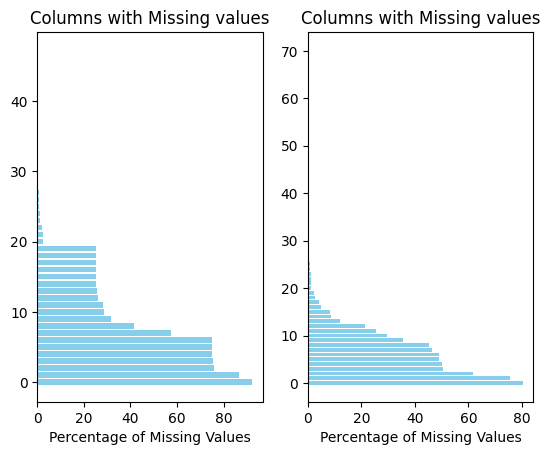

In [23]:
# Encode columns to efficiently act as axis labels
cols_encode = {e:i for i, e in enumerate(operatorDf.columns)}

fig, ax = plt.subplots(nrows=1, ncols=2)

# Calculate the percentage of missing values for each column
missing_percentage = (operatorDf.isnull().sum() / len(operatorDf)) * 100

# Sort the missing percentage in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Plot the missing values
ax[0].barh(list(cols_encode.values()), missing_percentage_sorted.values, color='skyblue')
ax[0].set_xlabel('Percentage of Missing Values')
ax[0].set_title('Columns with Missing values')


cols_encode = {e:i for i, e in enumerate(producerDf.columns)}

# Calculate the percentage of missing values for each column
missing_percentage = (producerDf.isnull().sum() / len(producerDf)) * 100

# Sort the missing percentage in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Plot the missing values
ax[1].barh(list(cols_encode.values()), missing_percentage_sorted.values, color='skyblue')
ax[1].set_xlabel('Percentage of Missing Values')
ax[1].set_title('Columns with Missing values')

plt.show()

# Merge Producer and Operator Data for Average Age

Earlier we identified that producer age groups have broder age range than operator age groups and thus we might need to combine the age groups for operators. However, some of the age groups for operators cannot be merged to form similar age groups for Producers. For example the `OPERATORS_AGE_GE_70_NUMBER_OF_OPERATORS` gives vague information about the Operator ages from 70-74 and correspondingly we have a column in the producer named `PRODUCERS_AGE_65_TO_74_NUMBER_OF_PRODUCERS`. Thus, we do not have this specific data for Operators for the age group 70-74 though having data for age group 65-69.

We can though combine the Avg age of both producers and operators as we have a uniform data for those.

In [26]:
producer_columns = [v.replace("PRODUCERS", 'FARMERS') for v in producerDf.columns]
operator_columns = [v.replace("OPERATORS", 'FARMERS') for v in operatorDf.columns]
operator_columns = [v.replace('FARMERS_PRINCIPAL', 'FARMERS') for v in operator_columns]

operatorDf_cols = operatorDf.columns
producerDf_cols = producerDf.columns
operatorDf.columns = operator_columns
producerDf.columns = producer_columns

In [27]:
common_cols = ['STATE_FIPS_CODE', 'COUNTY_CODE', 'YEAR', 'FARMERS_AGE_AVG_MEASURED_IN_YEARS']
common_df = operatorDf[common_cols]
common_df = pd.concat([common_df, producerDf[common_cols]], axis=0).reset_index(drop=True)

# Handling the disclosed variables.
w = np.where(common_df.FARMERS_AGE_AVG_MEASURED_IN_YEARS == '(D)', 1, 0)

# Remove the disclosure values: (D)
d_idx = []
for i in range(len(w)):
    if w[i] == 1:
        d_idx.append(i)

common_df.drop(d_idx, axis=0, inplace=True)

common_df['FARMERS_AGE_AVG_MEASURED_IN_YEARS'] = common_df['FARMERS_AGE_AVG_MEASURED_IN_YEARS'].astype('float64')

In [28]:
operatorDf.columns = operatorDf_cols
producerDf.columns = producerDf_cols

# Change of Age Over Years - COUNTY

In [29]:
# Removing non-contiguous US States
STATE_FIPS_CODE_TO_DROP = [15,2] # Removing Hawaii and Alaska
common_df = common_df.loc[(common_df['STATE_FIPS_CODE']!=15) & (common_df['STATE_FIPS_CODE']!=2)]

In [30]:
import requests

# URL to the geojson file
url = 'https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json'

# Fetch the JSON data
response = requests.get(url)
geojson_data = response.json()

# Extracting county code (FIPS) and county name mappings
county_code_name_mapping = {}
for feature in geojson_data['features']:
    fips_code = feature['properties']['COUNTY']  # FIPS code is stored in 'id'
    county_name = feature['properties']['NAME']  # County name is in the properties under 'NAME'
    county_code_name_mapping[int(fips_code)] = county_name

In [31]:
import pandas as pd
import plotly.express as px

common_df['FIPS'] = common_df['STATE_FIPS_CODE'].astype(str).str.zfill(2) + common_df['COUNTY_CODE'].astype(str).str.zfill(3)

fig = px.choropleth(
    common_df,
    locations='FIPS',
    geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
    color='FARMERS_AGE_AVG_MEASURED_IN_YEARS',
    hover_name='FIPS',
    animation_frame='YEAR',
    scope="usa",
    color_continuous_scale="turbo",
    range_color=(common_df['FARMERS_AGE_AVG_MEASURED_IN_YEARS'].min(), common_df['FARMERS_AGE_AVG_MEASURED_IN_YEARS'].max()),
    title="Average Age of Farmers by County Over Years",
    labels={'FARMERS_AGE_AVG_MEASURED_IN_YEARS': 'Average Age'}
)

fig.update_layout(
    geo_scope='usa',
    height=600,
    width=900
)

fig.show()

# Change of Age Over Years - STATE

In [32]:
state_fips = {
    '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE', '11': 'DC', '12': 'FL',
    '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME',
    '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO', '30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH',
    '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI',
    '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI',
    '56': 'WY'
}

In [33]:
import pandas as pd
import plotly.express as px
import json

state_df = common_df.groupby(['STATE_FIPS_CODE','YEAR'])['FARMERS_AGE_AVG_MEASURED_IN_YEARS'].mean().reset_index()
state_df['STATE'] = state_df['STATE_FIPS_CODE'].astype(str).str.zfill(2).map(state_fips)

# common_df['FIPS'] = common_df['STATE_FIPS_CODE'].astype(str).str.zfill(2) + common_df['COUNTY_CODE'].astype(str).str.zfill(3)

fig = px.choropleth(
    state_df,
    locations='STATE',
    # geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
    locationmode = 'USA-states',
    color='FARMERS_AGE_AVG_MEASURED_IN_YEARS',
    animation_frame='YEAR',
    scope="usa",
    color_continuous_scale="turbo",
    range_color=(common_df['FARMERS_AGE_AVG_MEASURED_IN_YEARS'].min(), common_df['FARMERS_AGE_AVG_MEASURED_IN_YEARS'].max()),
    title="Average Age of Farmers by State Over Years",
    labels={'FARMERS_AGE_AVG_MEASURED_IN_YEARS': 'Average Age'}
)

fig.update_layout(
    geo_scope='usa',
    height=600,
    width=900
)

fig.show()

## Change in average age w.r.t Number of producers.

In [34]:
import plotly.express as px
import numpy as np
import pandas as pd

# Assuming 'producerDf' is your DataFrame
# Extract specific columns
producerDfNumProd = producerDf[['PRODUCERS_AGE_AVG_MEASURED_IN_YEARS', 'PRODUCERS_NUMBER_OF_PRODUCERS']].reset_index(drop=True)

# Create the bar chart using Plotly
fig = px.bar(
    producerDfNumProd,
    x='PRODUCERS_AGE_AVG_MEASURED_IN_YEARS',
    y='PRODUCERS_NUMBER_OF_PRODUCERS',
    labels={
        'PRODUCERS_AGE_AVG_MEASURED_IN_YEARS': 'Average Producer Age',
        'PRODUCERS_NUMBER_OF_PRODUCERS': 'Number of Producers'
    },
    title="Number of Producers are normal distributed"
)

# Show the plot
fig.show()

In [35]:
def plot_age_by_col_com(df, cols, group_labels, xlabel, ylabel, yaxis_range=None):
    '''
    Function to plot the distribution (bar chart) against age, with dynamic y-axis adjustment.

    Parameters:
    - df: DataFrame containing the data
    - cols: List of columns from the DataFrame to be plotted
    - group_labels: Labels corresponding to the columns
    - xlabel: Label for the x-axis
    - ylabel: Label for the y-axis
    - yaxis_range: Optional argument to specify y-axis range [min, max], or None for auto-adjustment
    '''
    # Extract the relevant columns and create a new DataFrame for visualization
    groups = df[cols].sum().reset_index()

    # Rename columns for better understanding
    groups.columns = ['Group Labels', ylabel]

    # Replace the column names with descriptive group labels
    groups['Group Labels'] = group_labels

    # Create the bar chart using Plotly
    fig = px.bar(
        groups,
        x='Group Labels',
        y=ylabel,
        title=f"{xlabel} comparison against {ylabel}",
        labels={'Group Labels': xlabel, ylabel: ylabel}
    )

    # Adjust the y-axis range if specified
    if yaxis_range is not None:
        fig.update_layout(yaxis=dict(range=yaxis_range))
    else:
        # Automatically adjust the y-axis based on data
        fig.update_layout(yaxis_autorange=True)

    # Show the plot
    fig.show()

## Plot the number of producers by age groups

In [36]:
import pandas as pd
import plotly.express as px

# Assuming 'producerDf' is already loaded as a DataFrame with the necessary columns
# Extract the specific columns related to age groups
age_group_columns = [
    'PRODUCERS_AGE_25_TO_34_NUMBER_OF_PRODUCERS',
    'PRODUCERS_AGE_35_TO_44_NUMBER_OF_PRODUCERS',
    'PRODUCERS_AGE_45_TO_54_NUMBER_OF_PRODUCERS',
    'PRODUCERS_AGE_55_TO_64_NUMBER_OF_PRODUCERS',
    'PRODUCERS_AGE_65_TO_74_NUMBER_OF_PRODUCERS',
    'PRODUCERS_AGE_GE_75_NUMBER_OF_PRODUCERS'
]

groups = [
    '25 to 34',
    '35 to 44',
    '45 to 54',
    '55 to 64',
    '65 to 74',
    '>=75']

plot_age_by_col_com(producerDf, age_group_columns, groups, 'Age', 'Number of Producers')

In [37]:
import pandas as pd
import plotly.express as px

# Assuming 'producerDf' is already loaded as a DataFrame with the necessary columns
# Extract the specific columns related to age groups
age_group_columns = [
    'OPERATORS_PRINCIPAL_AGE_25_TO_34_NUMBER_OF_OPERATORS',
    'OPERATORS_PRINCIPAL_AGE_35_TO_44_NUMBER_OF_OPERATORS',
    'OPERATORS_PRINCIPAL_AGE_45_TO_54_NUMBER_OF_OPERATORS',
    'OPERATORS_PRINCIPAL_AGE_55_TO_59_NUMBER_OF_OPERATORS',
    'OPERATORS_PRINCIPAL_AGE_60_TO_64_NUMBER_OF_OPERATORS',
    'OPERATORS_PRINCIPAL_AGE_65_TO_69_NUMBER_OF_OPERATORS',
    'OPERATORS_PRINCIPAL_AGE_GE_70_NUMBER_OF_OPERATORS'
]

group_cols = [
    '25 to 34',
    '35 to 44',
    '45 to 54',
    '55 to 59',
    '60 to 64',
    '65 to 69',
    '>=70'
]
plot_age_by_col_com(operatorDf, age_group_columns, group_cols, 'Number of Producers', 'Age Group')

## Race Distinction against Number of Producers

In [38]:

race_cols = [
'PRODUCERS_AMERICAN_INDIAN_OR_ALASKA_NATIVE_NUMBER_OF_PRODUCERS',
'PRODUCERS_ASIAN_NUMBER_OF_PRODUCERS',
'PRODUCERS_BLACK_OR_AFRICAN_AMERICAN_NUMBER_OF_PRODUCERS',
'PRODUCERS_HISPANIC_NUMBER_OF_PRODUCERS',
'PRODUCERS_MULTI_RACE_NUMBER_OF_PRODUCERS',
'PRODUCERS_NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER_NUMBER_OF_PRODUCERS',
'PRODUCERS_WHITE_NUMBER_OF_PRODUCERS'
]

groups = [
    'American Indian Or Alaska Native',
    'Asian',
    'Black or African American',
    'Hispanic',
    'Multi Race',
    'Native Hawaiian or other Pacific Islander',
    'White'
]


plot_age_by_col_com(producerDf, race_cols, groups, 'Race Distinction', "Number of Producers")

## Check for redundancy of columns

In [ ]:
tmp = producerDf[['PRODUCERS_AGE_LT_35_NUMBER_OF_PRODUCERS', 'PRODUCERS_AGE_25_TO_34_NUMBER_OF_PRODUCERS', 'PRODUCERS_AGE_LT_25_NUMBER_OF_PRODUCERS']].reset_index(drop=True)
agg = []
for _,e in tmp.iterrows():
  agg.append(e['PRODUCERS_AGE_LT_35_NUMBER_OF_PRODUCERS'] - (e['PRODUCERS_AGE_25_TO_34_NUMBER_OF_PRODUCERS'] + e['PRODUCERS_AGE_LT_25_NUMBER_OF_PRODUCERS']))

tmp['agg'] = agg

In [ ]:
tmp['agg'].unique()

The above experiment proves that the `PRODUCERS_AGE_LT_35_NUMBER_OF_PRODUCERS` column is indeed a redundant column and can easily be obtained using the `PRODUCERS_AGE_25_TO_34_NUMBER_OF_PRODUCERS` and `PRODUCERS_AGE_LT_25_NUMBER_OF_PRODUCERS` columns.



## Number of Producers by Sex

In [ ]:
cols = [
    'PRODUCERS_ALL_FEMALE_NUMBER_OF_PRODUCERS',
    'PRODUCERS_ALL_MALE_NUMBER_OF_PRODUCERS',
    'PRODUCERS_ALL_NUMBER_OF_PRODUCERS',
    'PRODUCERS_FEMALE_NUMBER_OF_PRODUCERS',
    'PRODUCERS_MALE_NUMBER_OF_PRODUCERS',
]

groups = [
    'All Female Producers',
    'All Male Producers',
    'All Producers',
    'Female Producers',
    'Male Producers'
]

plot_age_by_col_com(producerDf, cols, groups, 'Sex', 'Number of Producers')

Let's just take the columns corresponding to decision making

## Decision Making comparison against number of producers

In [ ]:
decisionMakingCols = []
for e in producerDf.columns:
  if "DECISIONMAKING" in e:
    decisionMakingCols.append(e)
    # print(e)

In [ ]:
cols = decisionMakingCols

groups = ['day-to-day',
          'estate',
          'land use',
          'livestock',
          'marketing',
          'record keeping']

plot_age_by_col_com(producerDf, cols, groups, 'decision Making', 'Number of Producers')

Analyzing OPERATORS

# Distribution of Miscellaneous Columns

In [ ]:
misc_cols = list(set(landTotalsDf.columns) - set(producerDf.columns) - set(operatorDf.columns)) + ['YEAR', 'STATE_FIPS_CODE','COUNTY_CODE']

misc_data = landTotalsDf[misc_cols]

b = misc_data.isna().sum()
fig = px.histogram(x = b.index, y = b.values)
fig.update_layout(title='Distribution of MIscellaneous Columns',
                  yaxis_title='Frequency')
fig.show()

In [ ]:
misc_data.isna().sum().hist()

In [ ]:
# Aggregating data by year to analyze time trends for cropland harvested and farm operations
cropland_harvested_by_year = misc_data.groupby('YEAR')['AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS'].mean()
farm_operations_by_year = misc_data.groupby('YEAR')['FARM_OPERATIONS_NUMBER_OF_OPERATIONS'].mean()

# Plotting time trends
plt.figure(figsize=(10, 6))

# Plot Cropland Harvested Over Time
plt.plot(cropland_harvested_by_year, label='Average Cropland Harvested (Number of Operations)', marker='o', color='green')
plt.plot(farm_operations_by_year, label='Average Farm Operations (Number of Operations)', marker='o', color='blue')

# Adding labels and title
plt.title('Time Trends for Cropland Harvested and Farm Operations (1997-2022)')
plt.xlabel('Year')
plt.ylabel('Average Number of Operations')
plt.xticks(cropland_harvested_by_year.index, rotation=45)  # Ensuring individual years are shown on the x-axis
plt.legend()

plt.grid(True)
plt.show()

#Sales Analysis

In [ ]:
%cd /content/drive/MyDrive/HDSI_Datathon/Prompt-2-Data

In [ ]:
#Reading the Data
state_level = pd.read_excel('state_level_2002_2007_2012_2017_2022.xlsx')

In [ ]:
state_level.columns

In [ ]:

rename_dict = {
    'FARM SALES: (LESS THAN 1,000 $)':'<1000',
    'FARM SALES: (1,000 TO 2,499 $)':'1,000 - 2,499',
    'FARM SALES: (2,500 TO 4,999 $)':'2,500 - 4,999',
    'FARM SALES: (5,000 TO 9,999 $)' :'5,000 - 9,999',
    'FARM SALES: (10,000 TO 24,999 $)': '10,000 - 24,999',
    'FARM SALES: (25,000 TO 49,999 $)': '25,000 - 49,999',
    'FARM SALES: (50,000 TO 99,999 $)': '50,000 - 99,999',
    'FARM SALES: (100,000 TO 249,999 $)': '100,000 - 249,000',
    'FARM SALES: (250,000 TO 499,999 $)': '250,000 - 499,999',
    'FARM SALES: (500,000 TO 999,999 $)': '500,000 - 999,999',
    'FARM SALES: (1,000,000 OR MORE $)':'1,000,000<',
    'NOT SPECIFIED': 'TOTAL FARMERS'
}
state_level = state_level.rename(columns=rename_dict)
state_level.columns

###Identifying non numeric values in the dataset

In [ ]:
def find_non_numeric_values(df):
  non_numeric_values = {}
  for column in df.columns:
    non_numeric = pd.to_numeric(df[column], errors='coerce').isna()
    if not non_numeric.values.all():
      non_numeric_values[column] = df[column][non_numeric].unique()
  return non_numeric_values
# Assuming 'state_level' is your DataFrame
non_numeric_values = find_non_numeric_values(state_level)

# Print out the columns and their non-numeric values
for col, values in non_numeric_values.items():
    print(f"Column '{col}' has non-numeric values: {values}")


In [ ]:
#Converting this values into nan and then finally converting it 0
state_level.iloc[:, 5:] = state_level.iloc[:, 5:].replace('-', np.nan)
state_level.iloc[:, 5:] = state_level.iloc[:, 5:].replace(np.nan, 0)

In [ ]:
df = state_level.copy()

#Readjusting Values based on Inflation Index

In [ ]:
#Setting GDP indices
gdp_indices = {
    2002: 75.5,
    2007: 83.352,
    2012: 93.172,
    2017: 100,
    2022: 117.996
}
#Column distinction
category_limits = {
    '<1000': 1000,
    '1,000 - 2,499': 2499,
    '2,500 - 4,999': 4999,
    '5,000 - 9,999': 9999,
    '10,000 - 24,999': 24999,
    '25,000 - 49,999': 49999,
    '50,000 - 99,999': 99999,
    '100,000 - 249,000': 249999,
    '250,000 - 499,999': 499999,
    '500,000 - 999,999': 999999,
    '1,000,000<': 1000000
}

def adjust_operators(row):
    year = row['Year']
    # print("Year: ",year)
    index_factor = 100 / gdp_indices[year]
    new_row = row.copy()
    for category, limit in category_limits.items():
        adjusted_limit = limit * index_factor
        if adjusted_limit>limit:  #For the years < 2017

            if category != '1,000,000<':  # Check if not the last category
                next_category = list(category_limits.keys())[list(category_limits.keys()).index(category) + 1]
                # Calculate overflow to next category
                overflow = ((adjusted_limit - limit)/limit) * row[category]
                new_row[next_category] = int(new_row[next_category] + overflow)
                new_row[category] = int(new_row[category] - overflow)
        elif adjusted_limit<limit:  #For the years > 2017
          if category != '<1000':
            previous_category = list(category_limits.keys())[list(category_limits.keys()).index(category) - 1]
            new_row[previous_category] += row[category]
            # Calculate overflow for previous category
            overflow = ((limit - adjusted_limit)/limit) * row[category]
            new_row[previous_category]=int(row[previous_category] + overflow)
            new_row[category] = int(row[category] - overflow)



    return new_row

# Apply the adjustment function
adjusted_sales_df = df.apply(adjust_operators, axis=1)

In [ ]:
adjusted_sales_df.head()

#Interactive Display

In [ ]:
#Code to visualize the distinction between Inflated and Non Inflated Values

def plot_state_year(state_code, year,inflation = True):
  if inflation:
    state_df = adjusted_sales_df[(adjusted_sales_df['State ANSI']==state_code) & (adjusted_sales_df['Year']==year)]
    state_df = state_df.drop(columns=['GEO', 'State ANSI', 'TOTAL FARMERS','Year'])
    # state_df.index = ['<25','25-34']
    state_df['Data Item'] = state_df['Data Item'].str.replace('NUMBER OF OPERATORS', '')
    state_df['Data Item'] = state_df['Data Item'].str.replace('PRINCIPAL','')
    state_df['Data Item'] = state_df['Data Item'].str.replace(' AGE, AVG, MEASURED IN YEARS','AVG YEARS')
    styled = state_df.style.background_gradient()
    styled = styled.set_properties(**{'width': '80px','height':'40px'})
    display(styled)
  if not inflation:
    state_df = df[(df['State ANSI']==state_code) & (df['Year']==year)]
    state_df = state_df.drop(columns=['GEO', 'State ANSI', 'TOTAL FARMERS','Year'])
    state_df['Data Item'] = state_df['Data Item'].str.replace('NUMBER OF OPERATORS', '')
    state_df['Data Item'] = state_df['Data Item'].str.replace('PRINCIPAL','')
    state_df['Data Item'] = state_df['Data Item'].str.replace(' AGE, AVG, MEASURED IN YEARS','AVG YEARS')
    styled = state_df.style.background_gradient()
    styled = styled.set_properties(**{'width': '80px','height':'40px'})
    display(styled)


In [ ]:
df.replace(np.nan,0,inplace=True)
state_dropdown = widgets.Dropdown(options = adjusted_sales_df['GEO'].unique(), description='State:')
#Selecting State ANSI code from GEO selected
state_value = adjusted_sales_df[adjusted_sales_df['GEO']==state_dropdown.value]['State ANSI'].unique()
state_value = state_value[0]
year_dropdown = widgets.Dropdown(options=[2002, 2007, 2012, 2017, 2022], description='Year:')
inflation_checkbox = widgets.Checkbox(value=True, description='Inflation Adjusted:')

def on_button_clicked(b):
    clear_output(wait=True)  # Clear previous output
    display(state_dropdown, year_dropdown, inflation_checkbox, button)
    plot_state_year(state_value, year_dropdown.value, inflation_checkbox.value)


# Create button widget
button = widgets.Button(description="Plot")
button.on_click(on_button_clicked)  # Attach click event

# Display widgets

display(state_dropdown, year_dropdown, inflation_checkbox, button)